
# Source Sheet - 3/29/18

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
%matplotlib inline

In [3]:
class Source:
    
    def __init__(self,strength,x,y):
    
        '''
        location and strength of each source
    
        strength: float
            strength of the source
        x: float
            x location of the source
        y: float
            y location of the source
        
        '''
    
        self.strength = strength
        self.x = x
        self.y = y
    
    def velocity(self,X,Y):
    
        '''
        Computes velocity field
    
        X : 2D numpy array of floats
            x_coordinates of mesh points
        
        Y : 2D numpy array of floats
            y_coordinates of mesh points
        '''
    
        self.u = self.strength/(2*np.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*np.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def streamfunc(self,X,Y):
    
        '''
        Computes stream function of the singularity
        '''
        self.psi = self.strength/(2*np.pi)*np.arctan(Y-self.y,X-self.x)

In [4]:
N = 100
x_start,x_end,y_start,y_end = -1.0,1.0,-1.5,1.5
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [20]:
u_inf = 1.0
u_freestream = u_inf*np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N), dtype=float)

N_sources = 11
strength = 5.0
strengths = strength / N_sources

x_loc = np.zeros(N_sources, dtype = float)
y_loc = np.linspace(-1.0,1.0,N_sources)

sources = np.empty(N_sources, dtype = object)

u = u_freestream.copy()
v = v_freestream.copy()

#create a line of sources
for i in range(N_sources):
    sources[i] = Source(strengths,x_loc[i],y_loc[i])
    sources[i].velocity(X,Y)
    u+=sources[i].u
    v+=sources[i].v

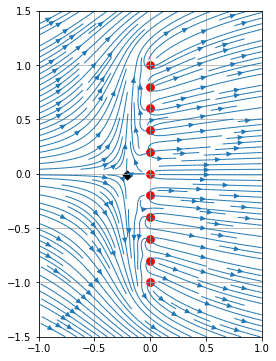

In [32]:
width = 4
height = (y_end-y_start)/(x_end -x_start) * width
plt.figure(figsize=(width,height))
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.grid()
plt.streamplot(X,Y,u,v,density=2,linewidth=1)
plt.scatter(x_loc,y_loc,s=60,color='r')

#stagnation point
magnitude = np.sqrt(u**2 + v**2)
j_stag,i_stag = np.unravel_index(magnitude.argmin(),magnitude.shape)
plt.scatter(x[i_stag], y[j_stag],color='k', s=40, marker='D')

In [30]:
print(integrate.quad(lambda x: x**2,0.0,1.0))

(0.33333333333333337, 3.700743415417189e-15)
